In [1]:
#  prediction model using decison tree and random forest - will borrower repay their loan in full - data from lendingclub.com from 2007-2010

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
loans = pd.read_csv("loan_data.csv")

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


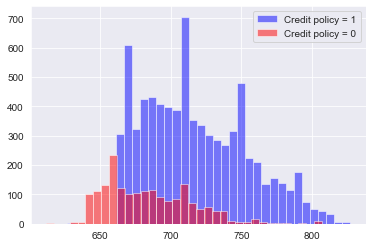

In [7]:
# plotting the fico scores vs credit policy
loans[loans["credit.policy"] == 1]["fico"].hist(bins=35, color = "blue", 
                                                label = "Credit policy = 1", alpha = 0.5)
loans[loans["credit.policy"] == 0]["fico"].hist(bins=35, color = "red", 
                                                label = "Credit policy = 0", alpha = 0.5)
plt.legend()

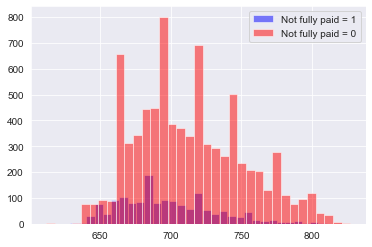

In [8]:
# plotting not fully paid loans vs fico score
loans[loans["not.fully.paid"] == 1]["fico"].hist(bins=35, color = "blue", 
                                                label = "Not fully paid = 1", alpha = 0.5)
loans[loans["not.fully.paid"] == 0]["fico"].hist(bins=35, color = "red", 
                                                label = "Not fully paid = 0", alpha = 0.5)
plt.legend()

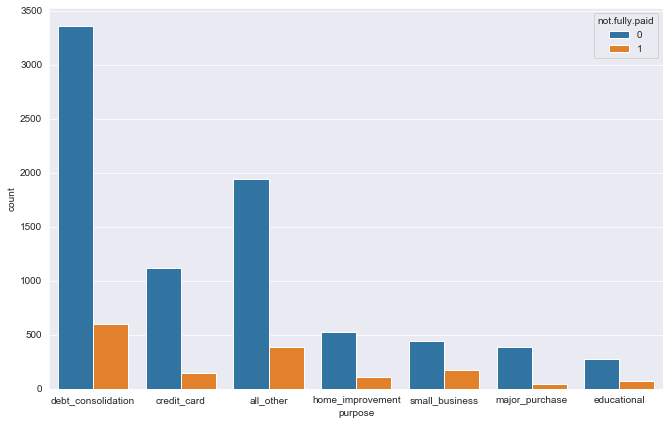

In [9]:
# loans by purpose - fully x not fully paid
plt.figure(figsize=(11,7))
sns.countplot(x= "purpose", hue = "not.fully.paid", data = loans)

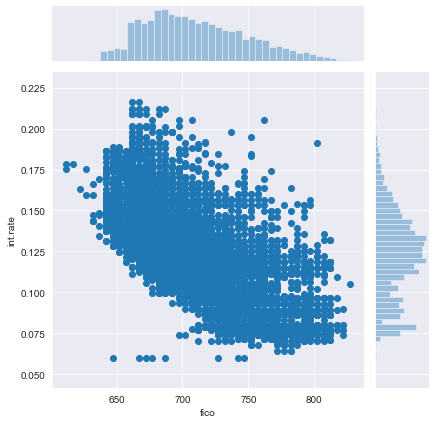

In [10]:
# plotting fico scores vs interest rates
sns.jointplot(x= "fico", y="int.rate", data= loans)

In [11]:
# getting dummies for cathegorical feature "purpose"
cat_feat = ["purpose"]
final_data = pd.get_dummies(loans, columns = cat_feat, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = final_data.drop("not.fully.paid",axis = 1)
y = final_data["not.fully.paid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier()

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
predictions = tree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.22      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161



In [20]:
print(confusion_matrix(y_test, predictions))

[[2227  423]
 [ 399  112]]


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred = rfc.predict(X_test)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.45      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.65      0.51      0.47      3161
weighted avg       0.78      0.84      0.77      3161



In [26]:
print(confusion_matrix(y_test, pred))

[[2638   12]
 [ 501   10]]


In [160]:
only0 = final_data[final_data["not.fully.paid"]==0]
only1 = final_data[final_data["not.fully.paid"]==1]

In [201]:
more1 = pd.concat([only0, only1, only1])

In [202]:
more1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11111 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               11111 non-null  int64  
 1   int.rate                    11111 non-null  float64
 2   installment                 11111 non-null  float64
 3   log.annual.inc              11111 non-null  float64
 4   dti                         11111 non-null  float64
 5   fico                        11111 non-null  int64  
 6   days.with.cr.line           11111 non-null  float64
 7   revol.bal                   11111 non-null  int64  
 8   revol.util                  11111 non-null  float64
 9   inq.last.6mths              11111 non-null  int64  
 10  delinq.2yrs                 11111 non-null  int64  
 11  pub.rec                     11111 non-null  int64  
 12  not.fully.paid              11111 non-null  int64  
 13  purpose_credit_card         1111

In [203]:
X = more1.drop("not.fully.paid",axis = 1)
y = more1["not.fully.paid"]

In [204]:
X_tra, X_test, y_tra, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [205]:
treee= DecisionTreeClassifier()

In [206]:
treee.fit(X_tra,y_tra)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [207]:
prediction = treee.predict(X_test)

In [208]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1987
           1       0.63      0.82      0.71       791

    accuracy                           0.81      2778
   macro avg       0.77      0.81      0.79      2778
weighted avg       0.84      0.81      0.82      2778

[[1606  381]
 [ 144  647]]


In [209]:
rfcc = RandomForestClassifier(n_estimators=500)

In [210]:
rfc.fit(X_tra, y_tra)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
prediction = rfc.predict(X_test)

In [212]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1987
           1       0.95      0.78      0.86       791

    accuracy                           0.93      2778
   macro avg       0.93      0.88      0.90      2778
weighted avg       0.93      0.93      0.92      2778

[[1956   31]
 [ 176  615]]
